# 第8章 分類モデルの評価を行う10本

## ノック71:評価対象のモデルを用意しよう

In [49]:
from sklearn.datasets import load_breast_cancer
load_data=load_breast_cancer()

import pandas as pd 

df=pd.DataFrame(load_data.data, columns=load_data.feature_names)
df['y']=load_data.target 

In [50]:
from sklearn.model_selection import train_test_split
X=df[['mean radius','mean texture']]
y=df['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(len(X_test))

171


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_depth=3,random_state=0).fit(X_train,y_train)
y_train_pred=rf_cls.predict(X_train)
y_test_pred=rf_cls.predict(X_test)

## ノック72:正解率を算出しよう

In [52]:
from sklearn.metrics import accuracy_score

print(f"訓練データ正解率：{accuracy_score(y_train,y_train_pred)}")
print(f"テストデータ正解率：{accuracy_score(y_test,y_test_pred)}")


訓練データ正解率：0.9195979899497487
テストデータ正解率：0.8888888888888888


## ノック73:混同行列を見てみよう

https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f

![](2022-09-25-06-50-13.png)

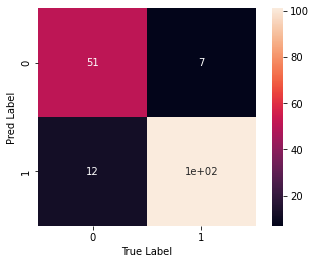

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

matrix= confusion_matrix(y_test,y_test_pred)

sns.heatmap(matrix.T, square=True,annot=True)
plt.xlabel('True Label')
plt.ylabel('Pred Label')
plt.show()

## ノック74:	適合率を算出しよう

![](2022-09-25-06-59-49.png)

In [54]:
from sklearn.metrics import precision_score

#ここでは悪性を陽性＝0とする
print(f'訓練データの適合率:{precision_score(y_train,y_train_pred,pos_label=0)}')
print(f'テストデータの適合率:{precision_score(y_test,y_test_pred,pos_label=0)}')


訓練データの適合率:0.9534883720930233
テストデータの適合率:0.8793103448275862


## ノック75:再現率を算出しよう

![](2022-09-25-07-02-34.png)

In [55]:
from sklearn.metrics import recall_score
print(f'訓練データの再現率:{recall_score(y_train,y_train_pred,pos_label=0)}')
print(f'テストデータの再現率:{recall_score(y_test,y_test_pred,pos_label=0)}')

訓練データの再現率:0.825503355704698
テストデータの再現率:0.8095238095238095


## ノック76:F1値を算出しよう

![](2022-09-25-07-08-28.png)

In [56]:
from sklearn.metrics import f1_score
print(f'訓練データのF1値:{f1_score(y_train,y_train_pred,pos_label=0)}')
print(f'テストデータのF1値:{f1_score(y_test,y_test_pred,pos_label=0)}')

訓練データのF1値:0.8848920863309353
テストデータのF1値:0.8429752066115702


## ノック77:分類レポートを見てみよう

In [57]:
from sklearn.metrics import classification_report

print("Train Score Report")
print(classification_report(y_train,y_train_pred))
print("Test Score Report")
print(classification_report(y_test,y_test_pred))

Train Score Report
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       149
           1       0.90      0.98      0.94       249

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.92      0.92      0.92       398

Test Score Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.89      0.94      0.91       108

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



## ノック78:予測結果の確信度を算出しよう

In [58]:
pred_proba_train=rf_cls.predict_proba(X_train)
pred_proba_test=rf_cls.predict_proba(X_test)

print(pred_proba_train[:5])
print(pred_proba_test[:5])

[[0.02592192 0.97407808]
 [0.09656751 0.90343249]
 [0.09158286 0.90841714]
 [0.89796431 0.10203569]
 [0.01416888 0.98583112]]
[[0.4094982  0.5905018 ]
 [0.43246982 0.56753018]
 [0.15599818 0.84400182]
 [0.20438491 0.79561509]
 [0.10739119 0.89260881]]


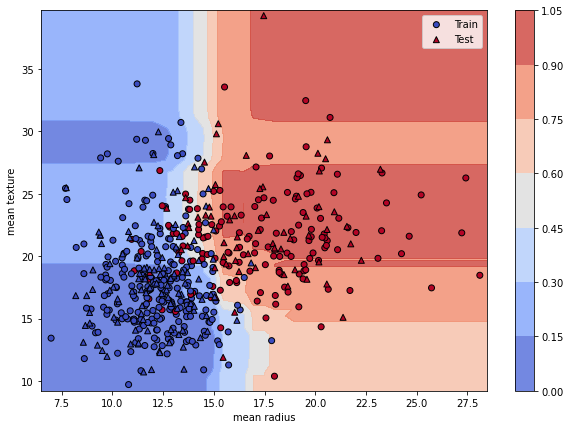

In [59]:
import numpy as np

x_min, x_max = X["mean radius"].min() - 0.5, X["mean radius"].max() + 0.5
y_min, y_max = X["mean texture"].min() - 0.5, X["mean texture"].max() + 0.5

step = 0.5
x_range = np.arange(x_min, x_max, step)
y_range = np.arange(y_min, y_max, step)
xx, yy = np.meshgrid(x_range, y_range)

Z = rf_cls.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.scatter(X_train["mean radius"], X_train["mean texture"], c=y_train,
            marker="o", edgecolors="k", cmap=plt.cm.coolwarm_r, label="Train")
plt.scatter(X_test["mean radius"], X_test["mean texture"], c=y_test,
            marker="^", edgecolors="k", cmap=plt.cm.coolwarm_r, label="Test")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.legend()
plt.show()


## ノック79:PR曲線を見てみよう

In [60]:
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import auc

precision,recall,thresholds=precision_recall_curve(y_test,pred_proba_test[:,0],pos_label=0)
print(precision[:3])
print(recall[:3])
print(thresholds[:3])


[0.60576923 0.60194175 0.60784314]
[1.         0.98412698 0.98412698]
[0.13356286 0.13510329 0.15190111]


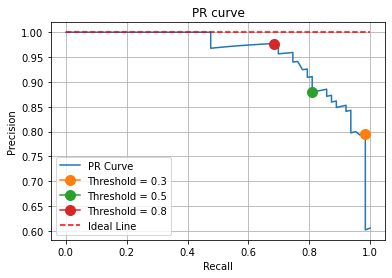

In [61]:
plt.plot(recall, precision, label="PR Curve")

tg_thres = [0.3, 0.5, 0.8]
for thres in tg_thres:
  tg_index = np.argmin(np.abs(thresholds - thres))
  plt.plot(recall[tg_index], precision[tg_index], marker="o",
           markersize=10, label=f"Threshold = {thres}")

plt.plot([0, 1], [1, 1], linestyle="--", color="red", label="Ideal Line")

plt.legend()
plt.title("PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


In [62]:
from sklearn.metrics import auc
auc(recall,precision)

0.9543523166632815

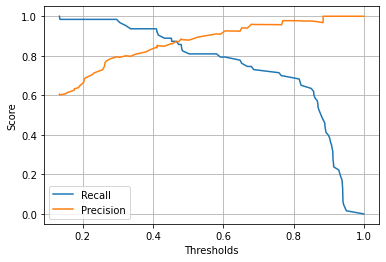

In [63]:
plt.plot(np.append(thresholds, 1), recall, label="Recall")
plt.plot(np.append(thresholds, 1), precision, label="Precision")
plt.xlabel("Thresholds")
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()


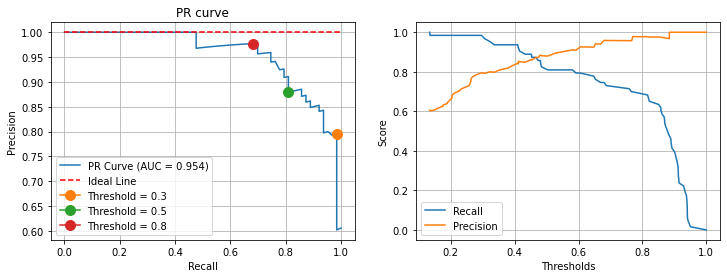

In [64]:
def plot_pr_curve(y_true,proba):
      precision, recall, thresholds = precision_recall_curve(y_true, proba[:,0], pos_label=0)
auc_score = auc(recall, precision)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)

plt.plot(recall, precision,label=f"PR Curve (AUC = {round(auc_score,3)})")
plt.plot([0,1], [1,1], linestyle="--", color="red", label="Ideal Line")

tg_thres = [0.3,0.5,0.8]
for thres in tg_thres:
    tg_index = np.argmin(np.abs(thresholds - thres))
    plt.plot(recall[tg_index], precision[tg_index], marker = "o",markersize=10, label=f"Threshold = {thres}")

plt.legend()
plt.title("PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

plt.subplot(1,2,2)

plt.plot(np.append(thresholds, 1), recall, label = "Recall")
plt.plot(np.append(thresholds, 1), precision, label = "Precision")
plt.xlabel("Thresholds")
plt.ylabel("Score")
plt.grid()
plt.legend()

plt.show()

## ノック80:各モデルの評価結果を見てみよう

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regression":LogisticRegression(), 
          "Linear SVM":SVC(kernel="linear",probability=True,random_state=0),
          "Kernel SVM":SVC(kernel="rbf",probability=True,random_state=0),
          "K Neighbors":KNeighborsClassifier(),
          "Decision Tree":DecisionTreeClassifier(max_depth=3,random_state=0),
          "Random Forest":RandomForestClassifier(max_depth=3,random_state=0)}

In [81]:
data_set = {"Train":[X_train_scaled,y_train],"Test":[X_test_scaled,y_test]}

In [83]:
for model_name in models.keys():

  print(f"{model_name} Score Report")
  model = models[model_name].fit(X_train_scaled,y_train)

  for data_set_name in data_set.keys():

    X_data = data_set[data_set_name][0]
    y_true = data_set[data_set_name][1]

    y_pred = model.predict(X_data)

    score_df = pd.DataFrame(classification_report(y_true,y_pred,output_dict=True))
    score_df["model"] = model_name
    score_df["type"] = data_set_name
    display(score_df)


    if data_set_name == "Test":
      proba = model.predict_proba(X_data)
      plot_pr_curve(y_true,proba)

Logistic Regression Score Report


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.888889,0.889734,0.889447,0.889311,0.889418,Logistic Regression,Train
recall,0.805369,0.939759,0.889447,0.872564,0.889447,Logistic Regression,Train
f1-score,0.845070,0.914062,0.889447,0.879566,0.888234,Logistic Regression,Train
support,149.000000,249.000000,0.889447,398.000000,398.000000,Logistic Regression,Train


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.885246,0.918182,0.906433,0.901714,0.906048,Logistic Regression,Test
recall,0.857143,0.935185,0.906433,0.896164,0.906433,Logistic Regression,Test
f1-score,0.870968,0.926606,0.906433,0.898787,0.906107,Logistic Regression,Test
support,63.000000,108.000000,0.906433,171.000000,171.000000,Logistic Regression,Test


Linear SVM Score Report


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.891473,0.873606,0.879397,0.882539,0.880295,Linear SVM,Train
recall,0.771812,0.943775,0.879397,0.857794,0.879397,Linear SVM,Train
f1-score,0.827338,0.907336,0.879397,0.867337,0.877387,Linear SVM,Train
support,149.000000,249.000000,0.879397,398.000000,398.000000,Linear SVM,Train


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.885246,0.918182,0.906433,0.901714,0.906048,Linear SVM,Test
recall,0.857143,0.935185,0.906433,0.896164,0.906433,Linear SVM,Test
f1-score,0.870968,0.926606,0.906433,0.898787,0.906107,Linear SVM,Test
support,63.000000,108.000000,0.906433,171.000000,171.000000,Linear SVM,Test


Kernel SVM Score Report


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.923664,0.895131,0.904523,0.909398,0.905813,Kernel SVM,Train
recall,0.812081,0.959839,0.904523,0.885960,0.904523,Kernel SVM,Train
f1-score,0.864286,0.926357,0.904523,0.895321,0.903119,Kernel SVM,Train
support,149.000000,249.000000,0.904523,398.000000,398.000000,Kernel SVM,Train


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.898305,0.910714,0.906433,0.904510,0.906142,Kernel SVM,Test
recall,0.841270,0.944444,0.906433,0.892857,0.906433,Kernel SVM,Test
f1-score,0.868852,0.927273,0.906433,0.898063,0.905749,Kernel SVM,Test
support,63.000000,108.000000,0.906433,171.000000,171.000000,Kernel SVM,Test


K Neighbors Score Report


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.920290,0.915385,0.917085,0.917837,0.917221,K Neighbors,Train
recall,0.852349,0.955823,0.917085,0.904086,0.917085,K Neighbors,Train
f1-score,0.885017,0.935167,0.917085,0.910092,0.916392,K Neighbors,Train
support,149.000000,249.000000,0.917085,398.000000,398.000000,K Neighbors,Train


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.850000,0.891892,0.877193,0.870946,0.876458,K Neighbors,Test
recall,0.809524,0.916667,0.877193,0.863095,0.877193,K Neighbors,Test
f1-score,0.829268,0.904110,0.877193,0.866689,0.876536,K Neighbors,Test
support,63.000000,108.000000,0.877193,171.000000,171.000000,K Neighbors,Test


Decision Tree Score Report


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.889655,0.920949,0.909548,0.905302,0.909233,Decision Tree,Train
recall,0.865772,0.935743,0.909548,0.900757,0.909548,Decision Tree,Train
f1-score,0.877551,0.928287,0.909548,0.902919,0.909293,Decision Tree,Train
support,149.000000,249.000000,0.909548,398.000000,398.000000,Decision Tree,Train


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.838235,0.941748,0.900585,0.889991,0.903611,Decision Tree,Test
recall,0.904762,0.898148,0.900585,0.901455,0.900585,Decision Tree,Test
f1-score,0.870229,0.919431,0.900585,0.894830,0.901304,Decision Tree,Test
support,63.000000,108.000000,0.900585,171.000000,171.000000,Decision Tree,Test


Random Forest Score Report


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.953488,0.903346,0.919598,0.928417,0.922118,Random Forest,Train
recall,0.825503,0.975904,0.919598,0.900703,0.919598,Random Forest,Train
f1-score,0.884892,0.938224,0.919598,0.911558,0.918258,Random Forest,Train
support,149.000000,249.000000,0.919598,398.000000,398.000000,Random Forest,Train


,0,1,accuracy,macro avg,weighted avg,model,type
precision,0.879310,0.893805,0.888889,0.886558,0.888465,Random Forest,Test
recall,0.809524,0.935185,0.888889,0.872354,0.888889,Random Forest,Test
f1-score,0.842975,0.914027,0.888889,0.878501,0.887850,Random Forest,Test
support,63.000000,108.000000,0.888889,171.000000,171.000000,Random Forest,Test
